## Import required libraries

In [1]:
import numpy as np # For linear algebra
import pandas as pd # For data processing, CSV file I/O
import os
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer

## Load the data from csv file

In [2]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

## EDA

In [3]:
print(df.describe()) # Summary statistics of the dataset

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


## Balanced dataset

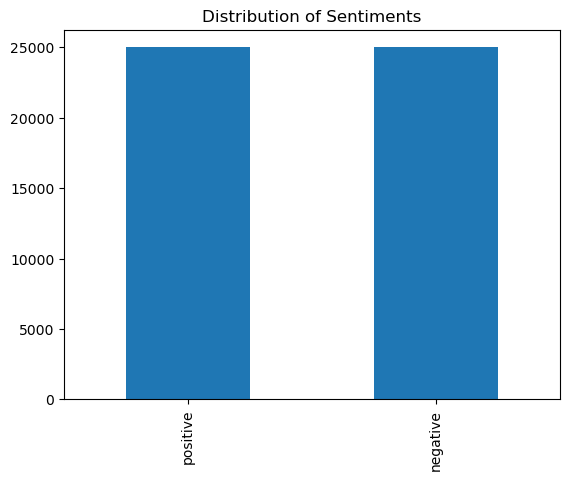

In [4]:
# Plotting the balance of the dataset for the label 'sentiment'
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiments')
plt.show()

In [5]:
# Extracting the review column from the dataframe for our Word2Vec model
cf = df["review"].apply(simple_preprocess) # Corpus file

In [6]:
# To get a sense of the most common words, 
#we can use a CountVectorizer to count words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

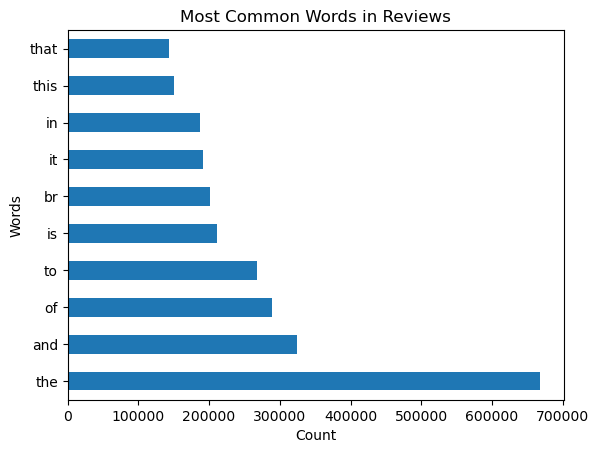

In [7]:
# Plotting the most common words in reviews
most_common_words = word_counts.sum().sort_values(ascending=False).head(10)
most_common_words.plot(kind='barh')
plt.title('Most Common Words in Reviews')
plt.xlabel('Count')
plt.ylabel('Words')
plt.show()

## Model Building

In [8]:
# Instantiate a Word2Vec model with a specified minimum count & processors
model = Word2Vec(cf, min_count=1, workers=4)

# Build vocabulary from the input sequence of sentences (cf)
model.build_vocab(cf)

# Train Word2Vec model using the built vocabulary & default number of epochs
model.train(cf, total_examples=model.corpus_count, epochs=model.epochs)


(42668122, 55882335)

In [9]:
# Saving the model
model.save("/kaggle/working/name.model")

## Vocabulary

In [10]:
# Checking output after applying simple_preprocess & building vocab
print(model.wv.index_to_key[400:500]) # Show only 100 words in vocabulary

['lines', 'children', 'dialogue', 'gives', 'piece', 'couldn', 'went', 'finally', 'case', 'yes', 'title', 'absolutely', 'live', 'laugh', 'oh', 'certainly', 'friend', 'lost', 'liked', 'entertaining', 'become', 'worse', 'sort', 'cinema', 'picture', 'loved', 'called', 'hope', 'felt', 'mr', 'overall', 'guys', 'based', 'entire', 'several', 'supposed', 'drama', 'sound', 'problem', 'white', 'against', 'waste', 'beginning', 'dark', 'fans', 'game', 'totally', 'care', 'humor', 'direction', 'wanted', 'under', 'seemed', 'lives', 'evil', 'lead', 'despite', 'guess', 'example', 'final', 'turn', 'already', 'throughout', 'becomes', 'killer', 'able', 'unfortunately', 'son', 'quality', 'days', 'history', 'heart', 'side', 'fine', 'michael', 'flick', 'wants', 'writing', 'horrible', 'amazing', 'run', 'today', 'art', 'town', 'act', 'works', 'close', 'kill', 'god', 'child', 'matter', 'etc', 'tries', 'viewer', 'past', 'genre', 'enjoyed', 'turns', 'brilliant', 'behind']


In [11]:
# To get the word vector for a particular word
print(model.wv.get_vector('movie'))

[-4.35577452e-01  3.26416612e+00 -2.43498993e+00 -1.17519832e+00
 -7.88421512e-01  3.76929760e-01 -1.45583975e+00  2.68782544e+00
  4.86550719e-01  3.78233051e+00  1.35928416e+00 -6.19242713e-02
 -2.53529215e+00 -2.80330229e+00  1.98197222e+00  2.62806201e+00
  8.07510555e-01 -9.77660775e-01 -1.53640187e+00 -5.28447688e-01
  6.93210244e-01  6.01163149e-01  1.58188272e+00 -4.48946893e-01
  1.03108585e+00  1.01600909e+00  8.07132840e-01 -1.78788632e-01
 -3.39032769e-01 -5.88295399e-04  2.71444526e-02  8.93568575e-01
 -1.07090890e+00  8.20837915e-01 -2.67917705e+00 -1.30988848e+00
 -4.69673538e+00  5.86356282e-01 -1.52872121e+00 -4.06840682e-01
 -4.40003681e+00  6.65715516e-01 -4.14391470e+00 -2.45222187e+00
 -3.89584041e+00 -1.23051345e+00  1.26589209e-01 -3.83569360e+00
  1.50865269e+00  1.05526340e+00  1.03846693e+00 -7.56371692e-02
 -1.19142938e+00  1.42403162e+00 -4.88867491e-01 -2.88723254e+00
  1.36788344e+00  8.70873570e-01  8.81013691e-01 -4.32652444e-01
  5.02243459e-01 -1.04099

In [12]:
# Print number of epochs and corpus count for the trained model
print(f"Epochs: {model.epochs}, Corpus Count: {model.corpus_count}")

Epochs: 5, Corpus Count: 50000


In [13]:
# Finding most similar words to a given word
print(model.wv.most_similar("cinematography"))

[('photography', 0.8881800174713135), ('direction', 0.7430890202522278), ('scenery', 0.7413127422332764), ('lighting', 0.7123546004295349), ('editing', 0.6605257391929626), ('directing', 0.6395754218101501), ('soundtrack', 0.6322829723358154), ('storytelling', 0.6229903101921082), ('acting', 0.619269847869873), ('locations', 0.6190382838249207)]


In [14]:
# Finding similarity between two words
print(model.wv.similarity("screenplay","director"))

0.5834132


In [15]:
# Finding odd word
print(model.wv.doesnt_match(["cinematography", "screenplay", "director", "actor"]))

actor


In [16]:
# Find word that is most similar to words in positive list &
# most dissimilar from words in negative list
print(model.wv.most_similar(positive=['actor','screenplay'], negative=['director']))

[('performance', 0.6234627962112427), ('actress', 0.6108461618423462), ('acting', 0.5886443257331848), ('script', 0.5468723177909851), ('role', 0.519773006439209), ('performances', 0.514960527420044), ('cast', 0.5102733373641968), ('dialogue', 0.5056484341621399), ('casting', 0.5027557015419006), ('actors', 0.50234055519104)]
